<a href="https://colab.research.google.com/github/SamridhiParihar/DATA_PREPROCESSING/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

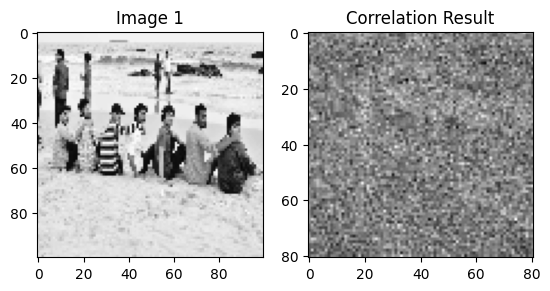

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load two images
image1 = cv2.imread('/content/c.jpeg')
image2 = cv2.imread('/content/c.jpeg')

# Step 2: Convert images to grayscale and resize
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Resize both images to a common size (e.g., 100x100)
image_size = (100, 100)
image_size2=(20,20)
image1_resized = cv2.resize(image1_gray, image_size)
image2_resized = cv2.resize(image2_gray, image_size2)

# Step 3: Define manual correlation function
def manual_correlation(template, image):
    template_height, template_width = template.shape
    image_height, image_width = image.shape

    result_height = image_height - template_height + 1
    result_width = image_width - template_width + 1
    result = np.zeros((result_height, result_width))

    for y in range(result_height):
        for x in range(result_width):
            region = image[y:y+template_height, x:x+template_width]
            correlation_score = np.sum(region * template)
            result[y, x] = correlation_score

    return result

# Step 4: Perform correlation
correlation_result = manual_correlation(image2_resized, image1_resized)

# Step 5: Display results
plt.subplot(1, 2, 1)
plt.imshow(image1_resized, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(correlation_result, cmap='gray')
plt.title('Correlation Result')

plt.show()


The left side would display the resized grayscale "Image 1" (which corresponds to image1_resized in the code).
The right side would display the correlation result map (which corresponds to correlation_result in the code), where brighter regions indicate higher correlation scores.

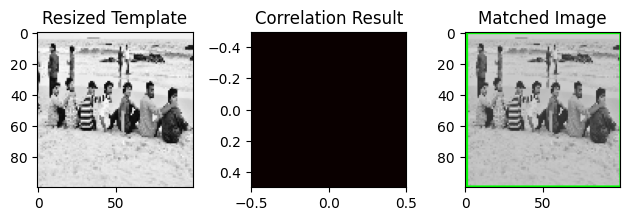

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and the template
image = cv2.imread('/content/c.jpeg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/c.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize the image and template to 100x100 pixels
resize_dim = (100, 100)
resized_image = cv2.resize(image, resize_dim)
resized_template = cv2.resize(template, resize_dim)

# Get dimensions of the resized image and template
image_height, image_width = resized_image.shape
template_height, template_width = resized_template.shape

# Initialize a result map
result_map = np.zeros((image_height - template_height + 1, image_width - template_width + 1))

# Perform manual template matching
for y in range(image_height - template_height + 1):
    for x in range(image_width - template_width + 1):
        region = resized_image[y:y+template_height, x:x+template_width]
        correlation_score = np.sum(region * resized_template)
        result_map[y, x] = correlation_score

# Find the location with the highest correlation score
max_position = np.unravel_index(np.argmax(result_map), result_map.shape)
top_left = max_position
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

# Draw a rectangle around the matched region in the original image
matched_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left[::-1], bottom_right[::-1], (0, 255, 0), 2)

# Display the resized template, correlation result, and the matched image
plt.subplot(1, 3, 1)
plt.imshow(resized_template, cmap='gray')
plt.title('Resized Template')

plt.subplot(1, 3, 2)
plt.imshow(result_map, cmap='hot')
plt.title('Correlation Result')

plt.subplot(1, 3, 3)
plt.imshow(matched_image)
plt.title('Matched Image')

plt.tight_layout()
plt.show()
